# City Transport Data Exploration

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Question 1](#question-1)
* [Question 2](#question-2)
* [Question 3](#question-3)
* [Question 4](#question-4)
* [Question 5](#question-5)
* [Question 6](#question-6)
* [Question 7](#question-7)

<a name="business-problem-statement"></a>
# Business Problem Statement:

1. Identify the date with the highest number of completed trips during the observed two-week timeframe.

2. Determine the peak number of completed trips within a 24-hour window.

3. Pinpoint the hour of the day with the highest volume of requests over the two-week duration.

4. Calculate the percentage of instances where all zeroes occurred during weekends (from Friday, 5 pm to Sunday, 3 am) out of the total for the two-week period.

5. Compute the weighted average ratio of completed trips per driver throughout the entire two-week period.

6. When planning 8-hour shifts for drivers, identify the busiest 8 consecutive hours during the two-week period in terms of unique requests. Assume that each driver follows the same shift every day.

7. True or False: Driver supply consistently increases when demand rises over the two-week period.

8. Identify the 72-hour period with the highest ratio of Zeroes to Eyeballs.

9. If the opportunity to add 5 drivers to any single hour of each day arises during the two-week period, determine the most suitable hour.

10. True or False: The dataset encompasses precisely two weeks of data for this analysis.

11. Considering the data from both weeks, identify a time that might serve as a more meaningful "end day" instead of midnight, reflecting the point where both supply and demand naturally reach their minimums.

![Image](https://akm-img-a-in.tosshub.com/businesstoday/images/story/202201/drive-g01a51efbf_1920-sixteen_nine.jpg?size=948:533)

<a name="data-description"></a>
# Data Description:

During the hour commencing at 4 pm (hour 16) on September 10th, 2012, 11 individuals engaged with the application for transportation services (Eyeballs). Out of these, 2 users encountered unavailability of cars (Zeroes), and 4 users initiated requests for transportation (Requests). Out of the 4 requests made, only 3 culminated in completed trips (Completed Trips). Throughout this period, a total of 6 drivers accessed the platform (Unique Drivers).

<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis:

In preparation for Exploratory Data Analysis (EDA), essential libraries such as Pandas, NumPy, Seaborn, and Matplotlib have been imported. Pandas and NumPy provide fundamental data manipulation and numerical computation capabilities, respectively, forming the backbone of data processing. Seaborn and Matplotlib, renowned for their data visualization prowess, offer a suite of tools to generate insightful charts and plots. This strategic selection of libraries signifies the intention to delve into the data's intricacies, employing statistical and graphical methods to extract meaningful patterns and trends. The combination of these libraries will facilitate a comprehensive exploration, enabling the extraction of valuable insights from the dataset

In [64]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The provided dataset "dataset_1.csv," is loaded into a Pandas DataFrame named original_data using the read_csv function. To prevent unintended modifications to the original dataset, a deep copy of the DataFrame is created and stored in the variable copied_data. This duplication ensures data integrity throughout subsequent analysis and manipulation, as any changes made to copied_data will not affect the original dataset. This cautious approach is fundamental in maintaining the fidelity of the initial data during the exploratory data analysis process.






In [65]:
# Read dataset
df_original = pd.read_csv("dataset_1.csv")
df_copy = df_original.copy()  # Create a copy to avoid modifying the original dataset


<a name="question-1"></a>
# Question 1

Filling empty date entries in the DataFrame df_copy using forward fill (method="ffill"). Subsequently, the data is aggregated based on the 'Date' column to calculate the sum of completed trips for each date. The result, stored in df_agg_date_result, provides the aggregated data. The maximum completed trips and its corresponding date are extracted using nlargest(1, 'Completed Trips ') and stored in max_completed_trips_date_result

In [66]:
# Forward fill empty dates
df_copy = df_copy.fillna(method="ffill")

# Aggregate on Date since the question asks for completed trips by Date
df_agg_date_result = df_copy.groupby('Date').sum().reset_index()
max_completed_trips_date_result = df_agg_date_result.nlargest(1, 'Completed Trips ')



The code extracts the date with the maximum completed trips from the previously obtained result (max_completed_trips_date_result). The corresponding date value is stored in the variable max_completed_trips_date_value_result.

In [67]:
# Get the date with the maximum completed trips
max_completed_trips_date_value_result = max_completed_trips_date_result['Date'].values[0]


<a name="question-2"></a>
# Question 2

Creating a timestamp for each row in the DataFrame df_copy using the 'Date' and 'Time (Local)' columns. This timestamp is stored in a new column named 'Timestamp'. Subsequently, the code calculates rolling sums with a 24-hour period using the 'Completed Trips' column, and the result is stored in df_agg_twentyfour_hrs_result. The maximum completed trips within a 24-hour period are then extracted using nlargest(1, 'Completed Trips '), and the result is stored in max_completed_trips_twentyfour_hrs_result.

In [68]:
# Create timestamp to use as an index for resampling
def create_timestamp(date_val, time_val):
    return pd.to_datetime(f"{date_val} {time_val}:00")

df_copy['Timestamp'] = df_copy.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

# Calculate rolling sums with a 24-hour period
indexer_val = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs_result = df_copy.set_index("Timestamp").rolling(window=indexer_val, min_periods=1).sum()
max_completed_trips_twentyfour_hrs_result = df_agg_twentyfour_hrs_result.nlargest(1, 'Completed Trips ')


C:\Users\WalkingTree\AppData\Local\Temp\ipykernel_32776\2269569166.py:9: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_twentyfour_hrs_result = df_copy.set_index("Timestamp").rolling(window=indexer_val, min_periods=1).sum()


Parsing the time interval and formats it into the "Year/Month/Day Hour:Minute" format. It uses the modified time format "%Y/%m/%d %H:%M". The resulting time intervals are added to a new column named 'Time Interval' in the df_agg_twentyfour_hrs_result DataFrame.

In [69]:
# Parse time interval to output
time_format_modified = "%Y/%m/%d %H:%M"
df_agg_twentyfour_hrs_result['Time Interval'] = df_agg_twentyfour_hrs_result.index.strftime(time_format_modified) + "-"


The code calculates the number of completed trips and corresponding time interval within a 24-hour period. It retrieves these values from the df_agg_twentyfour_hrs_result DataFrame. The results are then printed, displaying the number of completed trips and the associated time interval.

In [71]:
completed_trips_result = df_agg_twentyfour_hrs_result['Completed Trips '].values[0]
time_interval_result = df_agg_twentyfour_hrs_result['Time Interval'].values[0]

print("Number of completed trips:", completed_trips_result)
print("Time Interval:", time_interval_result)

Number of completed trips: 29.0
Time Interval: 2012/09/10 07:00-


<a name="question-3"></a>

# Question 3

Aggregating the data based on the hour of the day (Time (Local)), calculating the sum of relevant metrics for each hour. The result is stored in the df_agg_time_result DataFrame, and the hour with the maximum number of requests is identified using the nlargest function. The maximum requests result is stored in the max_requests_time_result variable.

In [72]:
# Aggregate on hour
df_agg_time_result = df_copy.groupby('Time (Local)').sum().reset_index()
max_requests_time_result = df_agg_time_result.nlargest(1, 'Requests ')


C:\Users\WalkingTree\AppData\Local\Temp\ipykernel_32776\3429275501.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_time_result = df_copy.groupby('Time (Local)').sum().reset_index()


Extracting the time with the maximum number of requests from the DataFrame, storing the result in the variable max_requests_time_value_result.

In [73]:
# Get the time with the maximum requests
max_requests_time_value_result = max_requests_time_result['Time (Local)'].values[0]


<a name="question-4"></a>
# Question 4

Calculating the total number of zeroes in the dataset and the number of zeroes occurring during the weekend, based on the given condition. The results are stored in the variables total_zeroes_result and weekend_zeroes_result, respectively.

In [74]:
# Count all zeroes in the dataset
total_zeroes_result = df_copy['Zeroes '].sum()

# Count all zeroes on the weekend based on the given condition
df_copy['Day'] = pd.to_datetime(df_copy['Date']).dt.dayofweek
weekend_zeroes_result = df_copy[((df_copy['Day'] == 4) & (df_copy['Time (Local)'] >= 17)) | 
                                (df_copy['Day'] == 5) | 
                                ((df_copy['Day'] == 6) & (df_copy['Time (Local)'] < 3))]['Zeroes '].sum()


Calculating the percentage of zeroes occurring during the weekend relative to the total number of zeroes in the dataset. The result is stored in the variable weekend_zeroes_pct_result and printed to the console.

In [75]:
# Calculate the percentage of weekend zeroes
weekend_zeroes_pct_result = weekend_zeroes_result / total_zeroes_result * 100
print(weekend_zeroes_pct_result, '%')

44.856543037088876 %


<a name="question-5"></a>
# Question 5

Calculating the ratio of completed trips per driver by dividing the 'Completed Trips' column by the 'Unique Drivers' column in the dataset. The resulting ratio is stored in the new column 'completed_trip_ratio_per_driver' in the DataFrame.

In [76]:
# Calculate the ratio of completed trips per driver
df_copy['completed_trip_ratio_per_driver'] = df_copy['Completed Trips '] / df_copy['Unique Drivers']


Dropping rows in the DataFrame where the 'Unique Drivers' column has NaN values. It then calculates the weighted average of the completed trip ratio per driver. The weight assigned to each data point is the corresponding day's completed trip ratio. The resulting weighted average ratio is stored in the variable 'weighted_average_ratio_result'

In [77]:

# Drop rows with NaN in 'Unique Drivers'
dataset_without_zero_unique_driver_result = df_copy[df_copy['Unique Drivers'] > 0]

# Calculate weighted average by giving weight as day's completed trip ratio of all completed trips
weighted_average_ratio_result = np.average(dataset_without_zero_unique_driver_result['completed_trip_ratio_per_driver'],
                                           weights=dataset_without_zero_unique_driver_result['Completed Trips '])


Checking whether the weighted average ratio is different from the normal average ratio. If the assertion fails, it raises an error indicating that the weighted average should be different from the normal average. This is a validation step to ensure that the two averages are indeed distinct.








In [78]:
# Check it is not the same with normal average
normal_average_ratio_result = np.average(dataset_without_zero_unique_driver_result['completed_trip_ratio_per_driver'])
assert weighted_average_ratio_result != normal_average_ratio_result, "Weighted average should be different from normal average"


<a name="question-6"></a>
# Question 6

Resampling the dataset with an 8-hour period, creating a new DataFrame (df_agg_eight_hrs_result) where the values are aggregated over each 8-hour interval. Additionally, it adds a 'Time Interval' column to the result DataFrame, specifying the time range for each interval.

In [79]:
# Resample with 8 hours period
df_agg_eight_hrs_result = df_copy.set_index("Timestamp").resample('8H').sum()
df_agg_eight_hrs_result['Time Interval'] = df_agg_eight_hrs_result.index.strftime(time_format_modified) + "-"


C:\Users\WalkingTree\AppData\Local\Temp\ipykernel_32776\4225161225.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg_eight_hrs_result = df_copy.set_index("Timestamp").resample('8H').sum()


Extracting the row with the maximum number of requests from the resampled DataFrame with 8-hour intervals, resulting in the max_requests_eight_hrs_result DataFrame.

In [80]:
max_requests_eight_hrs_result = df_agg_eight_hrs_result.nlargest(1, 'Requests ')


Printing the time interval associated with the maximum number of requests in an 8-hour period from the max_requests_eight_hrs_result DataFrame.

In [81]:
# Output time interval for the maximum requests in 8 hours period
max_requests_eight_hrs_time_interval_result = max_requests_eight_hrs_result['Time Interval'].values[0]
print("Max requests in 8 hours period. Time Interval:", max_requests_eight_hrs_time_interval_result)


Max requests in 8 hours period. Time Interval: 2012/09/21 16:00-


<a name="question-7"></a>
# Question 7

Creating an empty DataFrame called difference_df_result with only timestamps. It then calculates the differences in requests and supply by shifting the values in the 'Requests ' and 'Unique Drivers' columns, respectively, in the df_copy DataFrame. The resulting DataFrame, difference_df_result, contains columns 'request_diff' and 'supply_diff' capturing the changes in requests and supply.

In [82]:
# Create an empty dataframe with only timestamps
difference_df_result = pd.DataFrame(df_copy['Timestamp'])

# Calculate request differences to catch request increases
difference_df_result['request_diff'] = df_copy['Requests '].shift(-1) - df_copy['Requests ']

# Do the same for the supply side
difference_df_result['supply_diff'] = df_copy['Unique Drivers'].shift(-1) - df_copy['Unique Drivers']


Checking whether, for all instances where there is an increase in requests (request_diff > 0), there is also an increase in supply (supply_diff > 0). The result is a boolean indicating whether this condition holds for the entire DataFrame, and .all().item() is used to extract a single boolean value from the result.

In [83]:
(difference_df_result[difference_df_result['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

Generating a line plot to visualize the trends of both requests (Requests) and unique  drivers (Unique Drivers) over time. The x-axis represents the timestamp, and the y-axis represents the counts of requests and unique drivers. This visualization provides a graphical representation of how the number of requests and unique drivers changes over the given time period, allowing for an easy observation of trends and patterns. The plt.show() function displays the plot.

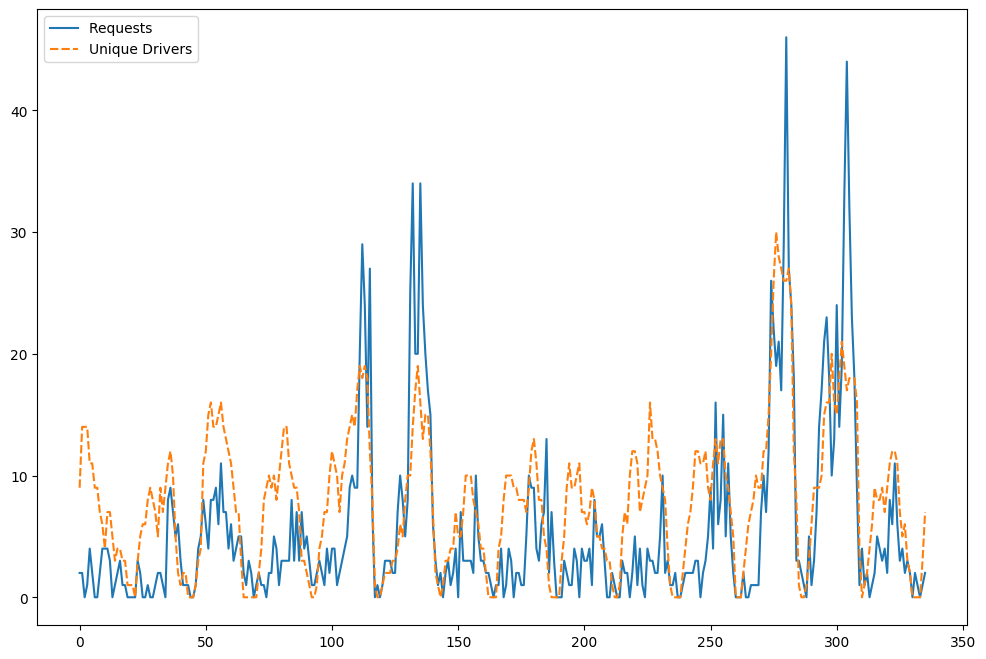

In [87]:
# Visualize Requests and Unique Drivers over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_copy[['Requests ', 'Unique Drivers', 'Timestamp']])
plt.show()
